# Q2 data 시각화

##### 1. 동적 크롤링을 이용하여 증권(data 1개) 내용을 일자별로 5p 수집하여 엑셀로 저장하시오.

In [86]:
import warnings
warnings.filterwarnings("ignore")
from selenium import webdriver
from bs4 import BeautifulSoup
import pandas as pd

op=webdriver.ChromeOptions()
op.headless=True #간접적으로 창을 열어서 확인
op.add_argument("window-size=1920x1080") #윈도우 사이즈 지정
op.add_argument('user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/100.0.4896.75 Safari/537.36')
b=webdriver.Chrome(options=op) #설정한 옵션을 추가
b.maximize_window()
b.get("http://naver.com") #네이버 접속
b.implicitly_wait(10)

b.find_element_by_xpath('//*[@id="query"]').send_keys("증권\n") #증권 검색
b.implicitly_wait(10)

b.execute_script("window.scrollTo(0,1000)") #스크롤 내리기
b.implicitly_wait(10)

b.find_element_by_xpath('//*[@id="web_1"]/div/div[2]/div[2]/a').click() #네이버 금융 클릭
b.implicitly_wait(10)

b.switch_to.window(b.window_handles[1]) #새 창으로 전환
b.implicitly_wait(10)

b.find_element_by_xpath('//*[@id="menu"]/ul/li[2]/a/span').click() #국내증시 클릭
b.implicitly_wait(10)

b.find_element_by_xpath('//*[@id="popularItemList"]/li[1]').click() #삼성전자 클릭
b.implicitly_wait(10)

b.execute_script("window.scrollTo(0,500)")  #스크롤 내리기
b.implicitly_wait(10)

b.find_element_by_xpath('//*[@id="content"]/ul/li[2]/a/span').click() #시세 클릭
b.implicitly_wait(10)

e=b.find_element_by_xpath('//*[@id="content"]/div[2]/iframe[2]') #내가 원하는 프레임 찾기
b.implicitly_wait(10)

b.switch_to.frame(e) #찾은 프레임으로 이동

title='날짜','종가','전일비','시가','고가','저가','거래량'
li_d=[] #수집한 데이터들을 저장할 리스트
for page in range(1,3): #1,2페이지
    b.execute_script("window.scrollTo(0,document.body.scrollHeight)") #스크롤 내리기
    b.implicitly_wait(10)
    b.find_element_by_xpath(f'/html/body/table[2]/tbody/tr/td[{page}]/a').click() #page페이지 클릭
    print(f"{page}페이지 진행 중")

    s=BeautifulSoup(b.page_source,'html.parser')
    data=s.find_all('td',attrs={'class':"num"})

    n=0 #반복 횟수를 나타내기 위한 변수
    for i in data:
        if n%6==0: #6번째마다
            li_d.append(i.previous_sibling.previous_sibling.text.strip()) #날짜 저장
            if i.img: #이미지가 존재한다면(전일비라면)
                if i.img['alt']=="상승": #이미지의 alt태그값이 상승이라면
                    li_d.append(int(i.text.replace(',',''))) #+를 붙인 뒤 저장
                    n+=1
                elif i.img['alt']=="하락": #이미지의 alt태그값이 하락이라면
                    li_d.append(-1*int(i.text.replace(',',''))) #-를 붙인 뒤 저장
                    n+=1
                else: #보합의 경우는 추가없이 저장
                    li_d.append(int(i.text.replace(',','')))
                    n+=1
            else:
                li_d.append(int(i.text.replace(',',''))) #이미지가 존재하지 않는다면(날짜,전일비 외 정보들)
                n+=1
        else:
            if i.img: #이미지가 존재한다면(전일비라면)
                if i.img['alt']=="상승": #이미지의 alt태그값이 상승이라면
                    li_d.append(int(i.text.replace(',',''))) #+를 붙인 뒤 저장
                    n+=1
                elif i.img['alt']=="하락": #이미지의 alt태그값이 하락이라면
                    li_d.append(-1*int(i.text.replace(',',''))) #-를 붙인 뒤 저장
                    n+=1
                else: #보합의 경우는 추가없이 저장
                    li_d.append(int(i.text.replace(',','')))
                    n+=1
            else: #이미지가 존재하지 않는다면(날짜,전일비 외 정보들)
                li_d.append(int(i.text.replace(',','')))
                n+=1

for page in range(4,7): #3~5페이지(2페이지 클릭하면 xpath의 td[숫자]가 1씩 증가해서 따로 진행)
    b.execute_script("window.scrollTo(0,document.body.scrollHeight)") #스크롤 내리기
    b.implicitly_wait(10)
    b.find_element_by_xpath(f'/html/body/table[2]/tbody/tr/td[{page}]/a').click() #page페이지 클릭
    print(f"{page-1}페이지 진행 중")

    s=BeautifulSoup(b.page_source,'html.parser')
    data=s.find_all('td',attrs={'class': "num"})

    #1,2페이지와 동일
    n=0
    for i in data:
        if n%6==0:
            li_d.append(i.previous_sibling.previous_sibling.text.strip())
            if i.img:
                if i.img['alt']=="상승": #이미지의 alt태그값이 상승이라면
                    li_d.append(int(i.text.replace(',','')))
                    n+=1
                elif i.img['alt']=="하락": #이미지의 alt태그값이 하락이라면
                    li_d.append(-1*int(i.text.replace(',','')))
                    n+=1
                else: #보합의 경우는 추가없이 저장
                    li_d.append(int(i.text.replace(',','')))
                    n+=1
            else:
                li_d.append(int(i.text.replace(',','')))
                n+=1
        else:
            if i.img:
                if i.img['alt']=="상승": #이미지의 alt태그값이 상승이라면
                    li_d.append(int(i.text.replace(',','')))
                    n+=1
                elif i.img['alt']=="하락":  #이미지의 alt태그값이 하락이라면
                    li_d.append(-1*int(i.text.replace(',','')))
                    n+=1
                else:  #보합의 경우는 추가없이 저장
                    li_d.append(int(i.text.replace(',','')))
                    n+=1
            else:
                li_d.append(int(i.text.replace(',','')))
                n+=1

e_d=[] #엑셀 파일로 만들 리스트
for i in range(0,len(li_d),7):
    e_d.append(li_d[i:i+7]) #7개 간격으로 나눠서 e_d에 저장

df=pd.DataFrame(e_d,columns=title) #e_d와 title로 데이터프레임 생성
df.to_excel("증권 데이터.xlsx") #데이터프레임을 엑셀파일로 저장

ModuleNotFoundError: No module named 'selenium'

##### 2. 저장된 data를 이용하여 데이터 프레임을 구축하시오

In [78]:
from pandas import DataFrame
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus']=False

In [81]:
df=pd.read_excel("증권 데이터.xlsx")
data=df.drop('Unnamed: 0',axis=1).sort_values('날짜',ascending=True).reset_index(drop=True)
data

,날짜,종가,전일비,시가,고가,저가,거래량
0,2022.01.26,73300,-700,73900,74400,73100,12976730
1,2022.01.27,71300,-2000,73800,74000,71300,22274777
2,2022.01.28,73300,2000,71300,73700,71200,21367447
3,2022.02.03,73300,0,74900,74900,73300,17744721
4,2022.02.04,74000,700,74300,74600,73400,12730034
5,2022.02.07,73000,-1000,73500,73600,72400,14240838
6,2022.02.08,73500,500,73800,74200,73000,11736666
7,2022.02.09,74700,1200,74300,74700,74000,9699122
8,2022.02.10,75400,700,75600,75800,74700,17746033
9,2022.02.11,74900,-500,75000,75500,74600,12205407


##### 3. 일자별 4가지(종자,시가,저가,고가)가격을 이용하여 꺾은 선 그래프로 표현하시오.

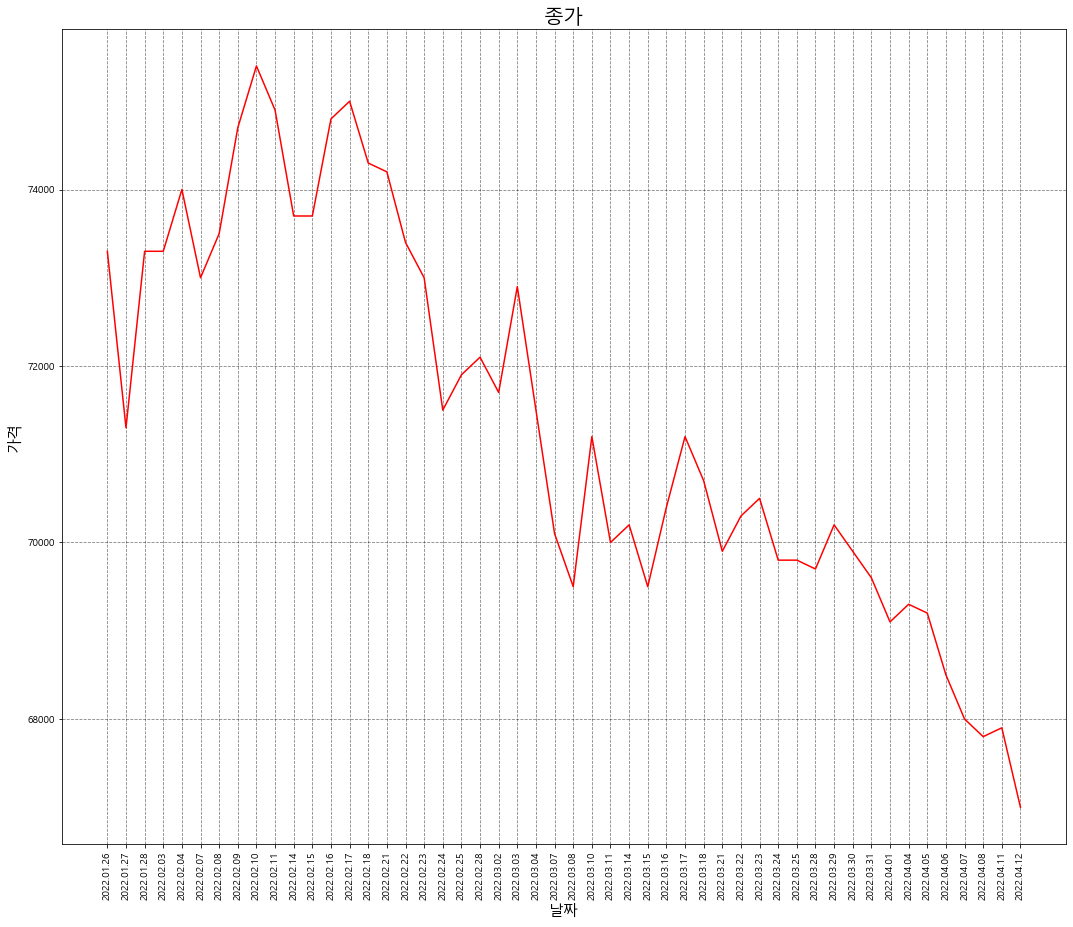

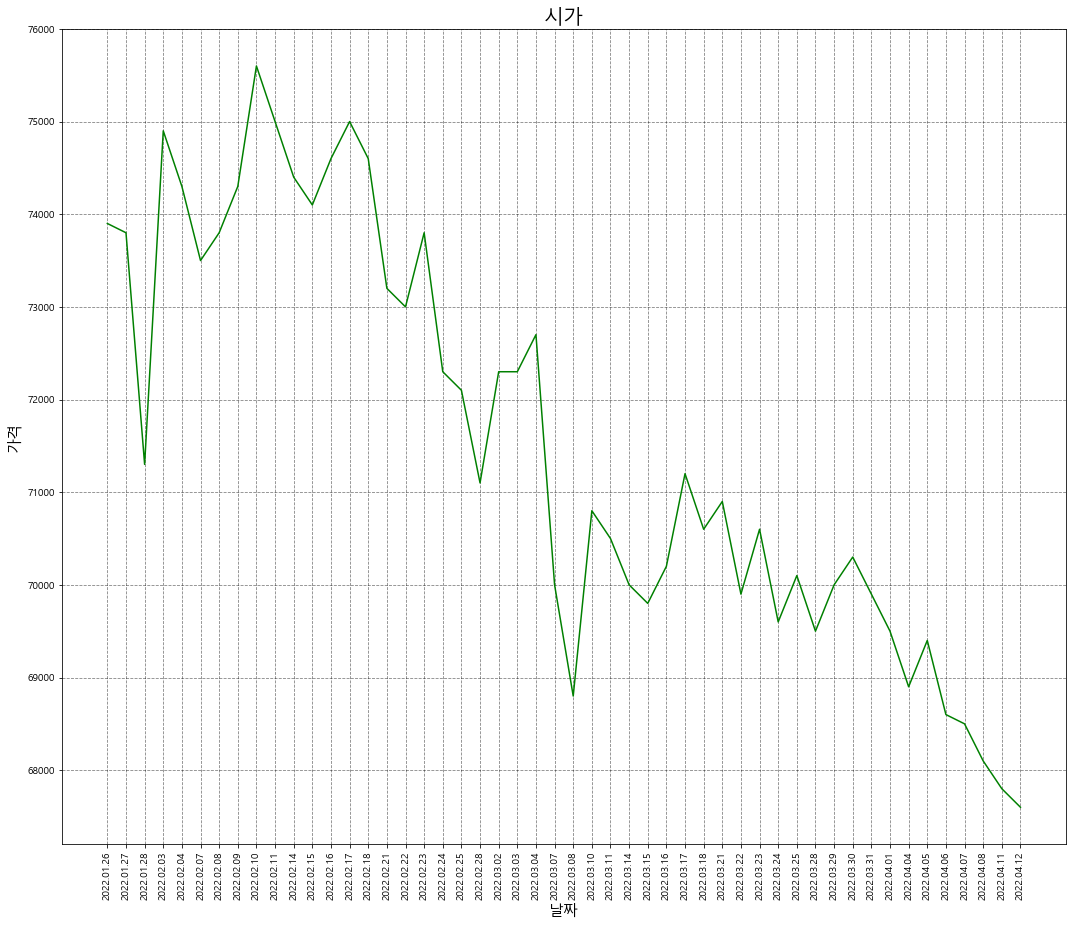

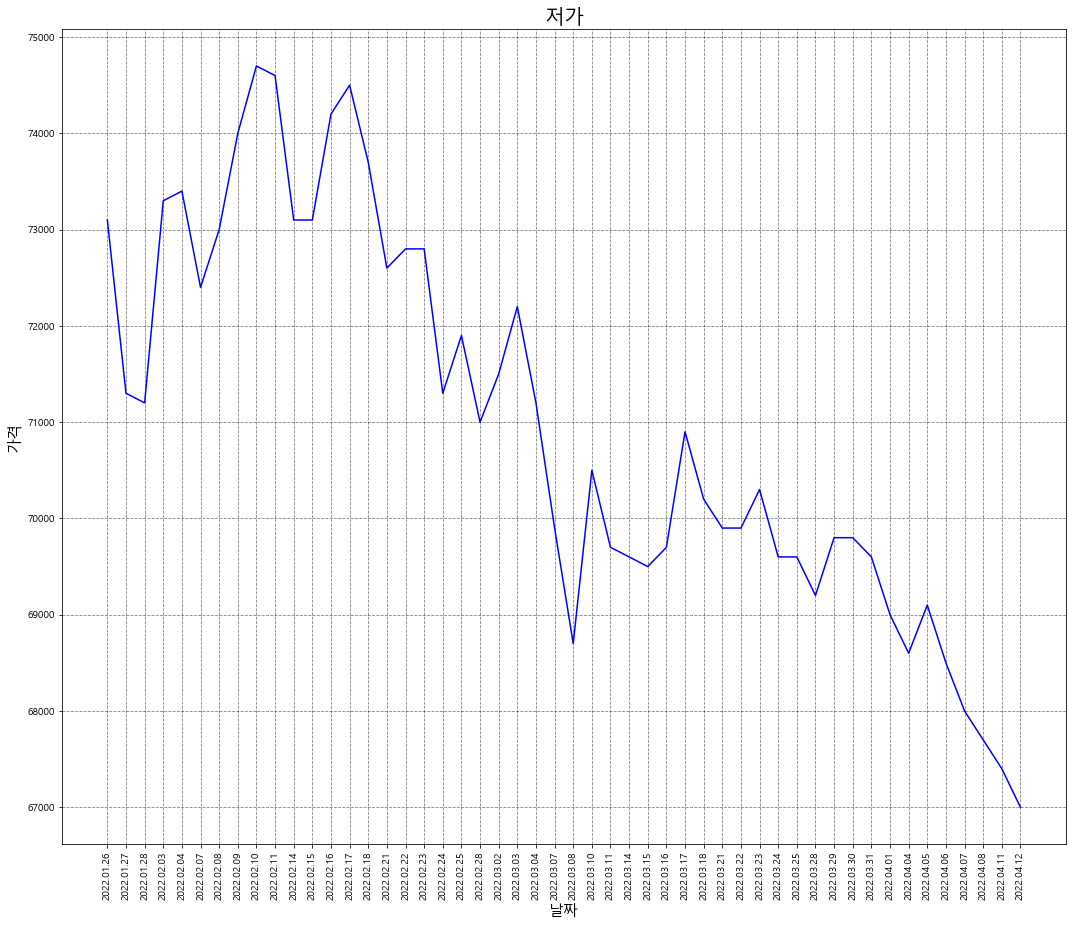

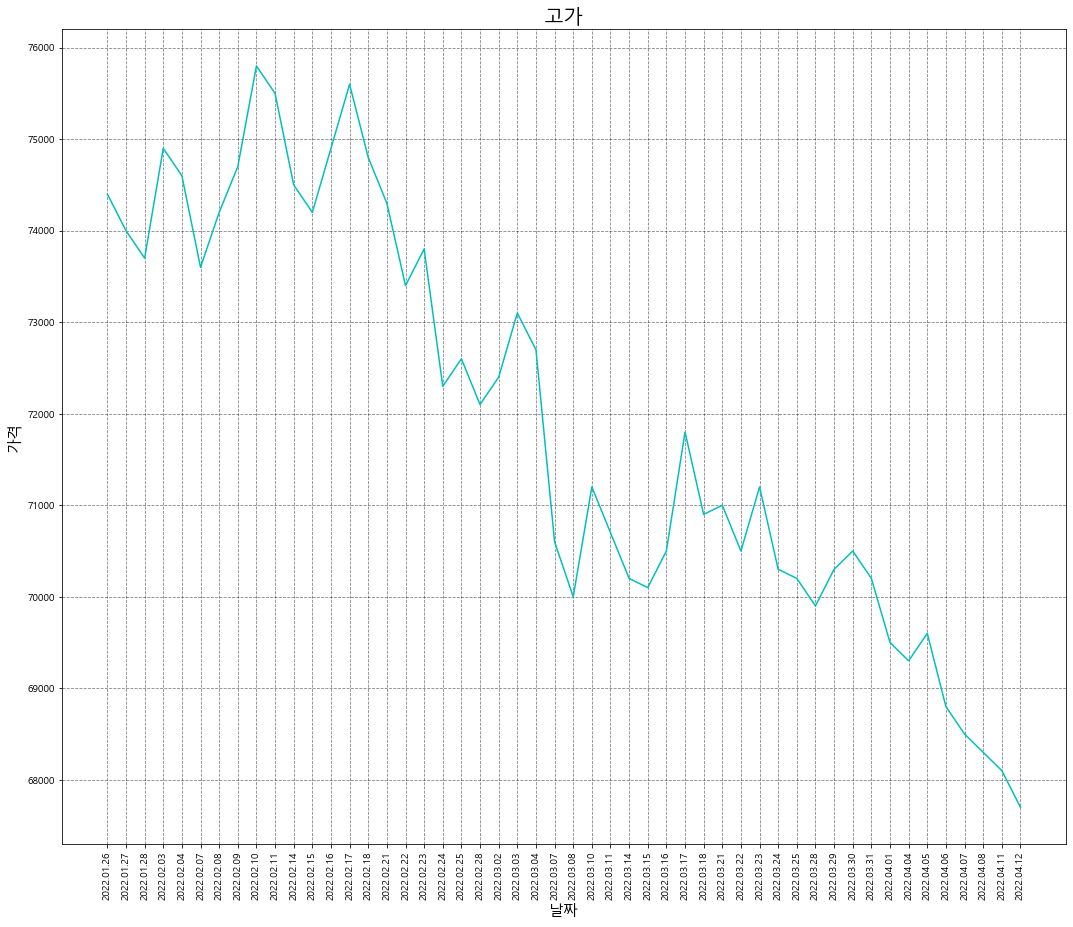

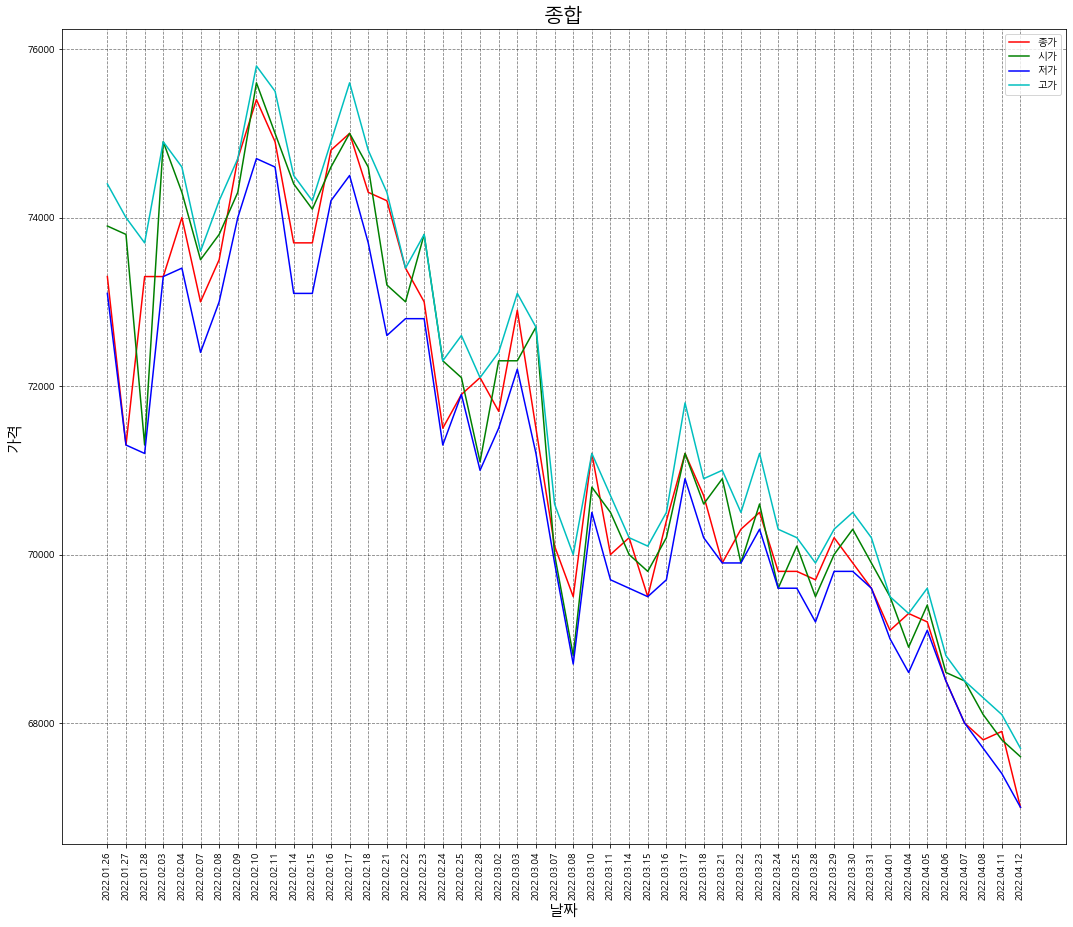

In [85]:
plt.figure(figsize=(18,15)) #그래프 기본 크기 설정
plt.plot(data['날짜'],data['종가'],label='종가',c='r') #종가 선그래프 그리기
plt.title('종가',fontsize=20)
plt.grid(True,c='k',ls='--',alpha=0.5)
plt.xlabel("날짜",fontsize=15) 
plt.ylabel("가격",fontsize=15)
plt.xticks(rotation=90) #x축 정보가 잘 보이게 90도 회전
plt.show()

plt.figure(figsize=(18,15)) #그래프 기본 크기 설정
plt.plot(data['날짜'],data['시가'],label='시가',c='g') #시가 선그래프 그리기
plt.title('시가',fontsize=20)
plt.grid(True,c='k',ls='--',alpha=0.5)
plt.xlabel("날짜",fontsize=15) 
plt.ylabel("가격",fontsize=15)
plt.xticks(rotation=90) #x축 정보가 잘 보이게 90도 회전
plt.show()

plt.figure(figsize=(18,15)) #그래프 기본 크기 설정
plt.plot(data['날짜'],data['저가'],label='저가',c='b') #저가 선그래프 그리기
plt.title('저가',fontsize=20)
plt.grid(True,c='k',ls='--',alpha=0.5)
plt.xlabel("날짜",fontsize=15) 
plt.ylabel("가격",fontsize=15)
plt.xticks(rotation=90) #x축 정보가 잘 보이게 90도 회전
plt.show()

plt.figure(figsize=(18,15)) #그래프 기본 크기 설정
plt.plot(data['날짜'],data['고가'],label='고가',c='c') #고가 선그래프 그리기
plt.title('고가',fontsize=20)
plt.grid(True,c='k',ls='--',alpha=0.5)
plt.xlabel("날짜",fontsize=15) 
plt.ylabel("가격",fontsize=15)
plt.xticks(rotation=90) #x축 정보가 잘 보이게 90도 회전
plt.show()

plt.figure(figsize=(18,15)) #그래프 기본 크기 설정
plt.plot(data['날짜'],data['종가'],label='종가',c='r') #종가 선그래프 그리기
plt.plot(data['날짜'],data['시가'],label='시가',c='g') #시가 선그래프 그리기
plt.plot(data['날짜'],data['저가'],label='저가',c='b') #저가 선그래프 그리기
plt.plot(data['날짜'],data['고가'],label='고가',c='c') #고가 선그래프 그리기
plt.title('종합',fontsize=20)
plt.grid(True,c='k',ls='--',alpha=0.5)
plt.xlabel("날짜",fontsize=15) 
plt.ylabel("가격",fontsize=15)
plt.xticks(rotation=90) #x축 정보가 잘 보이게 90도 회전
plt.legend()
plt.show()